Домашнее задание LIGHT
На входе датасет с информацией о лепестках Ириса

1) Кластеризовать датасет разными алгоритмами

2) Оценить качество кластеризации(посчитать метрику между кластеризованными данными и реальным значением таргета), написать отчет

In [0]:
https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings

In [0]:
from sklearn import datasets
data = datasets.load_iris()
target_names = data.target_names
X = data.data
y = data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [0]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(X_scale)
    cost.append(kmean.inertia_)  

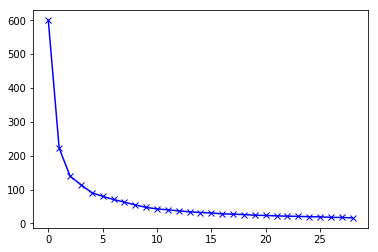

In [0]:
plt.plot(cost, 'bx-')

In [0]:
optimal_number_clusters = 3
kmean = KMeans(optimal_number_clusters)
kmean.fit(X)
labels = kmean.labels_

In [0]:
from sklearn import metrics

print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))



Homogeneity: 0.751
Completeness: 0.765
V-measure: 0.758


In [0]:
optimal_number_clusters = 3
kmean = KMeans(optimal_number_clusters)
kmean.fit(X_scale)
labels = kmean.labels_

print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))


Homogeneity: 0.659
Completeness: 0.660
V-measure: 0.659


([<matplotlib.patches.Wedge at 0x7f6e2380a278>,
 [Text(0.5096256471503443, 0.974823932700974, '1'),
  Text(-1.096142143910491, -0.09204564271768771, '0'),
  Text(0.5894094953465407, -0.9287607048079373, '2')],
 [Text(0.2779776257183696, 0.5317221451096221, '34.7%'),
  Text(-0.5978957148602678, -0.05020671420964783, '33.3%'),
  Text(0.32149608837084037, -0.5065967480770566, '32.0%')])

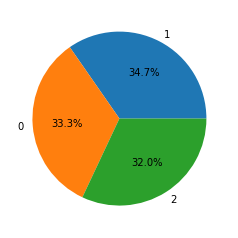

In [0]:
clusters=pd.concat([pd.DataFrame(X_scale), pd.DataFrame({'cluster':labels})], axis=1)
parts = clusters['cluster'].value_counts()
plt.pie(parts,labels=parts.index,autopct='%1.1f%%')

In [0]:
import itertools
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

rows = []
#for index, affinity in enumerate(('l1', 'l2', 'manhattan', 'cosine')):
for affinity, linkage  in itertools.product(['euclidean', 'manhattan', 'cosine'], ['average','complete','ward','single']):
  try:
    
    cluster = AgglomerativeClustering(linkage=linkage,affinity=affinity,n_clusters=3)
    labels = cluster.fit_predict(X)  

    row = {'affinity':affinity,'linkage':linkage,'V-measure':metrics.v_measure_score(y, labels), 'Homogeneity':metrics.homogeneity_score(y, labels), 'Completeness':metrics.completeness_score(y, labels)}      
    rows.append(row)
    #print(row)        
  except:
    None
 

In [0]:
rows = pd.DataFrame(rows)
rows.sort_values(['V-measure','Homogeneity','Completeness'], ascending=False)

,Completeness,Homogeneity,V-measure,affinity,linkage
0,0.815646,0.795982,0.805694,euclidean,average
5,0.803589,0.778177,0.790679,manhattan,complete
4,0.785902,0.769596,0.777663,manhattan,average
2,0.779596,0.760801,0.770084,euclidean,ward
8,0.773421,0.717059,0.744174,cosine,complete
6,0.951503,0.583617,0.723479,manhattan,single
1,0.745438,0.700115,0.722066,euclidean,complete
7,0.951166,0.579380,0.720118,cosine,average
9,0.951166,0.579380,0.720118,cosine,single
3,0.920240,0.587916,0.717464,euclidean,single


#Вывод

[Colab](https://colab.research.google.com/drive/1kuS9Z2G4GeNA1MIkKv600xpz48D3FN_B)

Лушая оценка (0.8057) кластеризации (AgglomerativeClustering) по критерию V-measure (гармоническое среднее по критериям Completeness и	Homogeneity	) получается по усредненным (linkage=average) евклидовым расстояниям (affinity=euclidean)

In [0]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(X)  

print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))

Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770


In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(X_scale)  

print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))

Homogeneity: 0.658
Completeness: 0.694
V-measure: 0.675


In [0]:
for index, linkage in enumerate(('average','complete','ward','single')):
  cluster = AgglomerativeClustering(linkage=linkage,affinity='euclidean',n_clusters=3)
  labels = cluster.fit_predict(X)  
  print(linkage)
  print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

  print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

  print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))  

average
Homogeneity: 0.796
Completeness: 0.816
V-measure: 0.806
complete
Homogeneity: 0.700
Completeness: 0.745
V-measure: 0.722
ward
Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770
single
Homogeneity: 0.588
Completeness: 0.920
V-measure: 0.717


NameError: ignored

In [0]:
import itertools

print (list(itertools.product([1,2], [3,4])))

# for p in itertools.permutations(([1,2],[3,4]),2):
#   print(''.join(str(x) for x in p))  

[(1, 3), (1, 4), (2, 3), (2, 4)]


In [0]:
#Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan',linkage='average')   
labels = cluster.fit_predict(X)  
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [0]:
print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))

Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770


In [0]:
labels[np.where(labels==0)]=4
labels[np.where(labels==1)]=3
labels[np.where(labels==2)]=5
labels = labels-3

In [0]:
print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))

Homogeneity: 0.761
Completeness: 0.780
V-measure: 0.770


# Clustering
Кластерный анализ (англ. cluster analysis) — многомерная статистическая процедура, выполняющая сбор данных, содержащих информацию о выборке объектов, и затем упорядочивающая объекты в сравнительно однородные группы. Задача кластеризации относится к статистической обработке, а также к широкому классу задач обучения без учителя.




In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings


# Ссылка на банковский датасет

https://yadi.sk/i/4azITqla7D4u1g

In [0]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


**DESCRIPTION OF DATASET**

CUST_ID : Identification of Credit Card holder (Categorical) BALANCE : Balance amount left in their account to make purchases 

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 

PURCHASES : Amount of purchases made from account 

ONEOFF_PURCHASES : Maximum purchase amount done in one-go 

INSTALLMENTS_PURCHASES : Amount of purchase done in installment 

CASH_ADVANCE : Cash in advance given by the user 

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 

PURCHASES_TRX : Numbe of purchase transactions made 

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user 

MINIMUM_PAYMENTS : Minimum amount of payments made by user 

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [0]:
data = pd.read_csv("CC GENERAL.csv",index_col=False)
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [0]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [0]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

In [0]:
# replace nan values
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54dc04e668>,
      dtype=object)

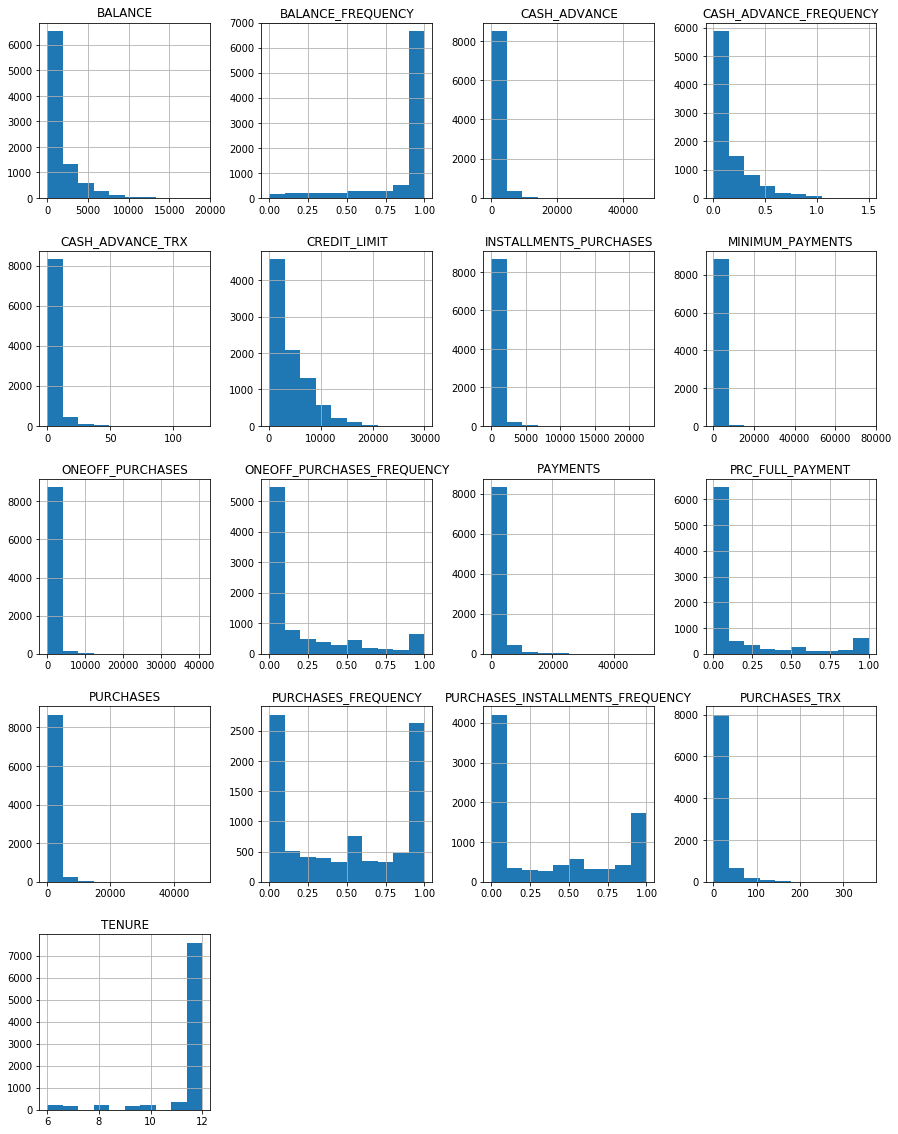

In [0]:
# check distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

In [0]:
data_prepared = data.drop(['CUST_ID'],axis=1)
X = np.asarray(data_prepared)

In [0]:
scale = StandardScaler()
X = scale.fit_transform(X)


**MODELING WITH K-MEANS**

Проводим итеративный поиск оптимальной инертности в данных
(сумма квадратов расстояний до их ближайшего центра кластера)

In [0]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean = KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

**Finding best split on clusters**

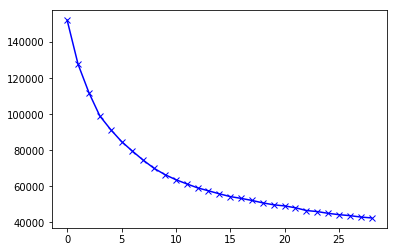

In [0]:
plt.plot(cost, 'bx-')

In [0]:
optimal_number_clusters = 6
kmean = KMeans(optimal_number_clusters)
kmean.fit(X)
labels = kmean.labels_

In [0]:
clusters=pd.concat([data_prepared, pd.DataFrame({'cluster':labels})], axis=1)

In [0]:
parts = clusters['cluster'].value_counts()
parts

2    3039
1    2227
0    1323
3    1311
4     968
5      82
Name: cluster, dtype: int64

([<matplotlib.patches.Wedge at 0x7f54d773a320>,
 [Text(0.5312819920214235, 0.9631923198166337, '2'),
  Text(-1.07192755770809, 0.24692369474388093, '1'),
  Text(-0.5759825638214936, -0.9371467794180479, '0'),
  Text(0.4013444087008118, -1.0241692563266074, '3'),
  Text(1.0142986331720534, -0.4256739159794791, '4'),
  Text(1.099544365692924, -0.031657351009612, '5')],
 [Text(0.289790177466231, 0.525377628990891, '34.0%'),
  Text(-0.5846877587498672, 0.13468565167848048, '24.9%'),
  Text(-0.31417230753899644, -0.5111709705916624, '14.8%'),
  Text(0.2189151320186246, -0.5586377761781494, '14.6%'),
  Text(0.553253799912029, -0.23218577235244314, '10.8%'),
  Text(0.5997514721961402, -0.017267646005242908, '0.9%')])

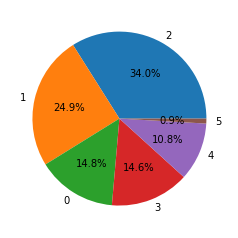

In [0]:
plt.pie(parts,labels=parts.index,autopct='%1.1f%%')

**Interpretation of clusters**

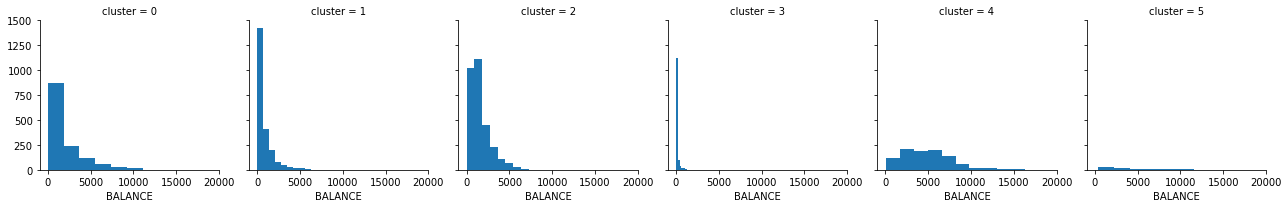

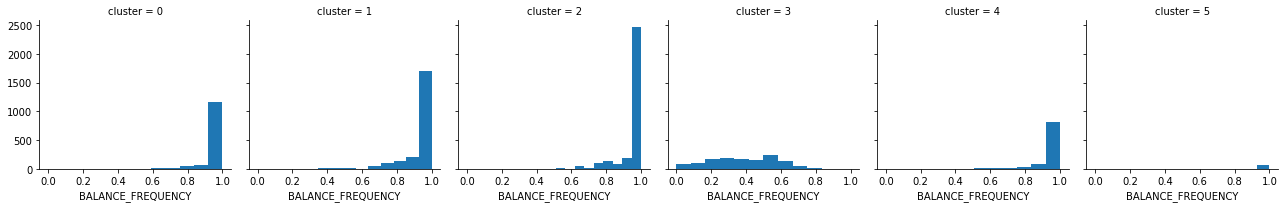

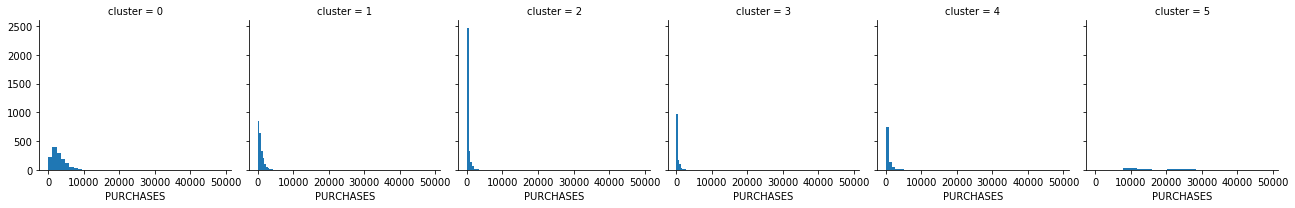

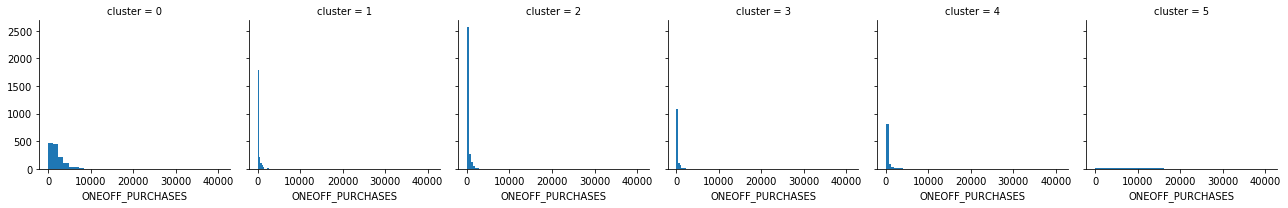

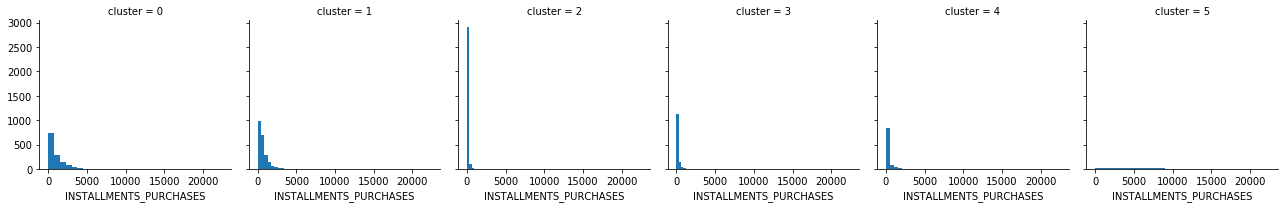

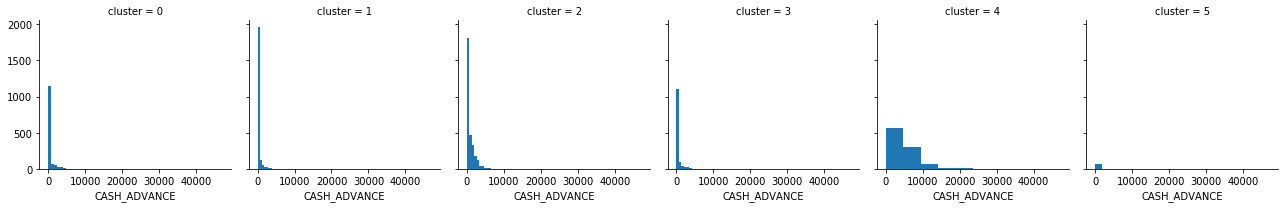

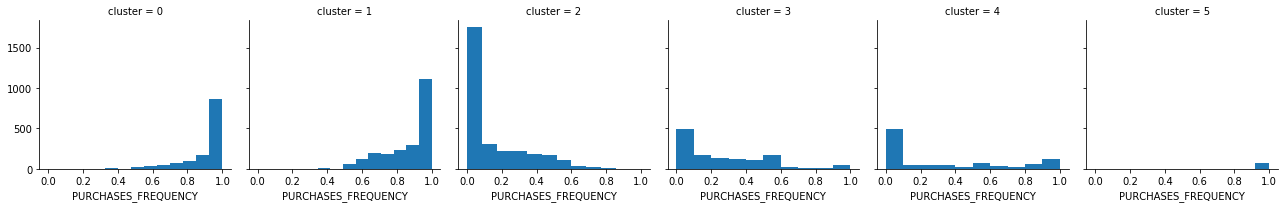

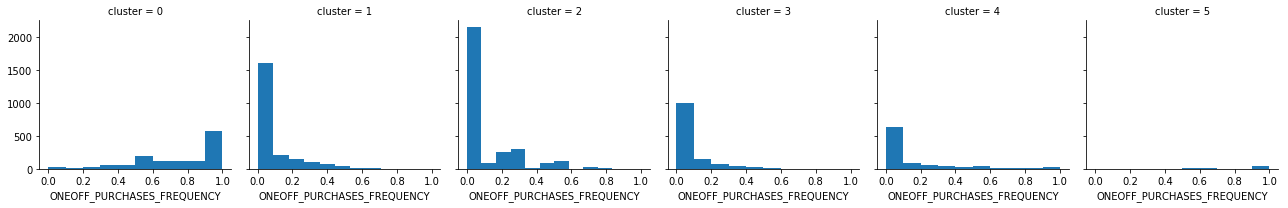

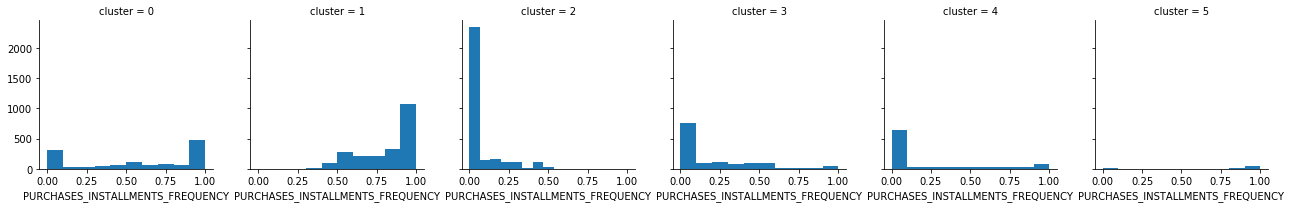

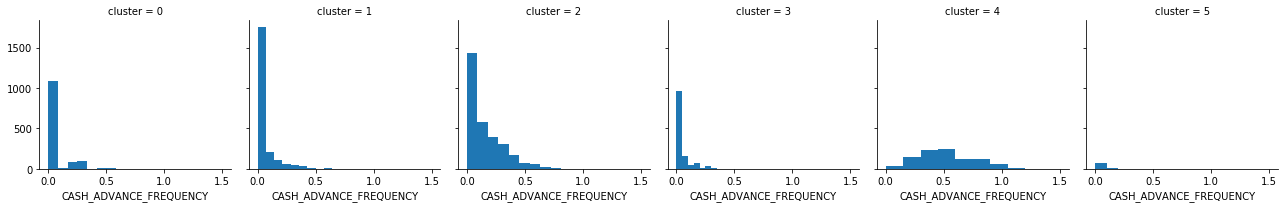

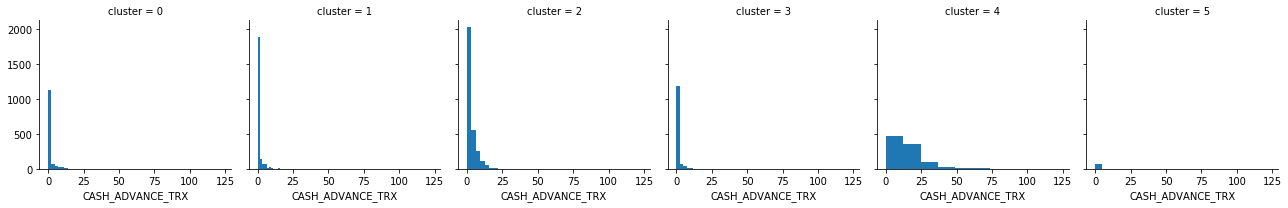

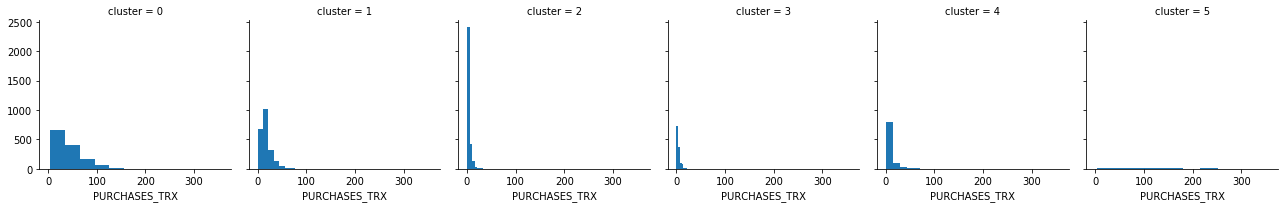

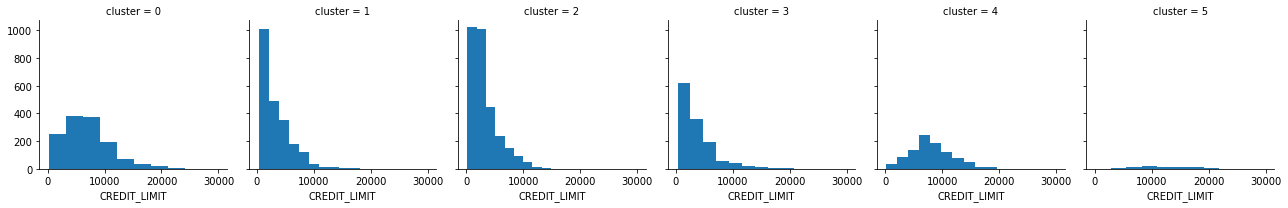

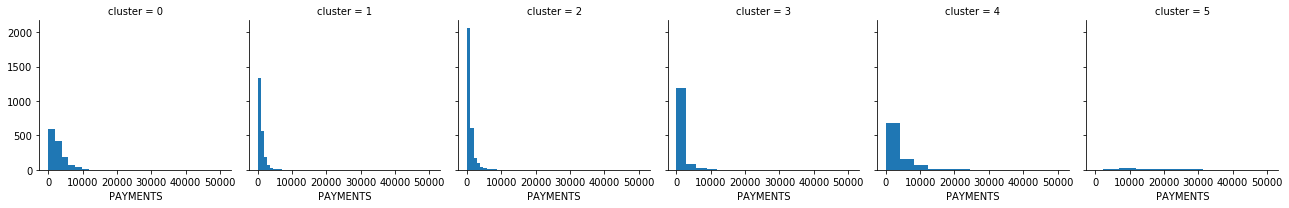

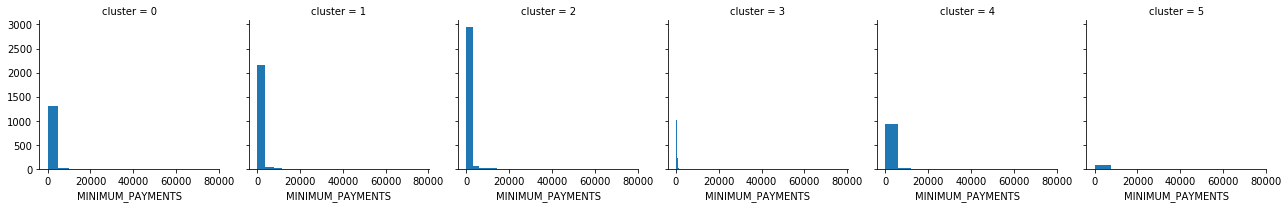

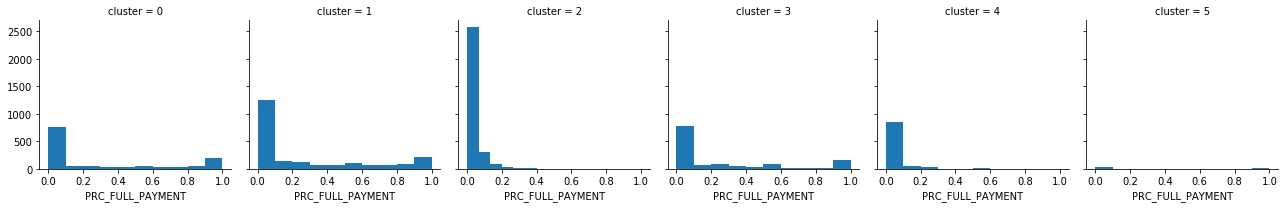

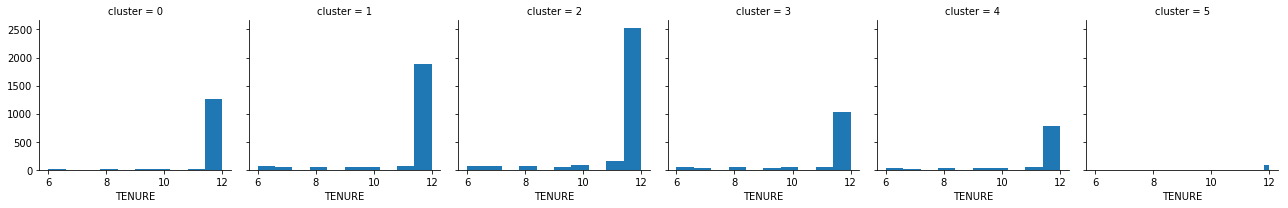

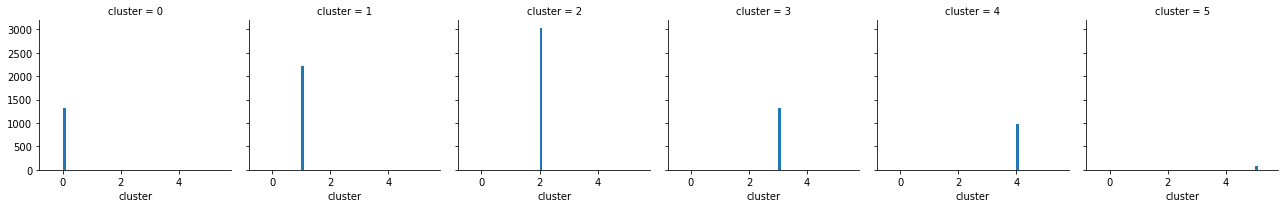

In [0]:
for c in clusters:
  grid= sns.FacetGrid(clusters, col='cluster')
  grid.map(plt.hist, c)

# Hierarchical clustering

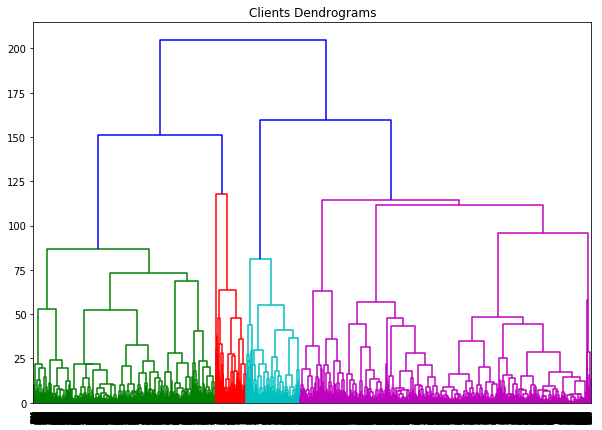

In [0]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Clients Dendrograms")

dend = shc.dendrogram(shc.linkage(X, method='ward'))  

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  


array([1, 2, 3, ..., 1, 1, 1])

In [0]:
labels=cluster.labels_
clusters=pd.concat([data_prepared, pd.DataFrame({'cluster':labels})], axis=1)

In [0]:
parts = clusters['cluster'].value_counts()
parts

1    4668
3    2931
2     864
0     487
Name: cluster, dtype: int64

([<matplotlib.patches.Wedge at 0x7f54d1a997f0>,
 [Text(-0.07446369240131777, 1.0974767234497331, '1'),
  Text(-0.43491286928223105, -1.010371612889385, '3'),
  Text(0.8788991191251453, -0.661465296444979, '2'),
  Text(1.0839669476076885, -0.1871247084007641, '0')],
 [Text(-0.040616559491627874, 0.5986236673362181, '52.2%'),
  Text(-0.23722520142667144, -0.5511117888487553, '32.7%'),
  Text(0.47939951952280646, -0.3607992526063521, '9.7%'),
  Text(0.5912546986951027, -0.10206802276405312, '5.4%')])

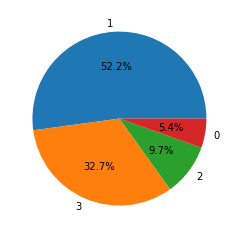

In [0]:
plt.pie(parts,labels=parts.index,autopct='%1.1f%%')

**Interpretation of clusters**

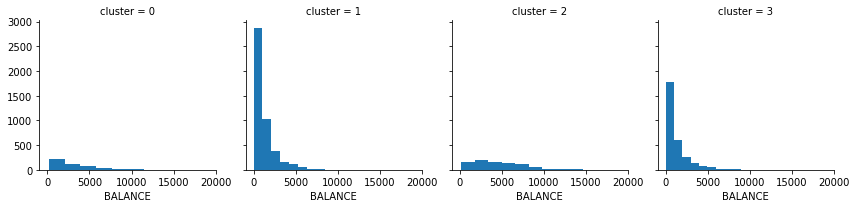

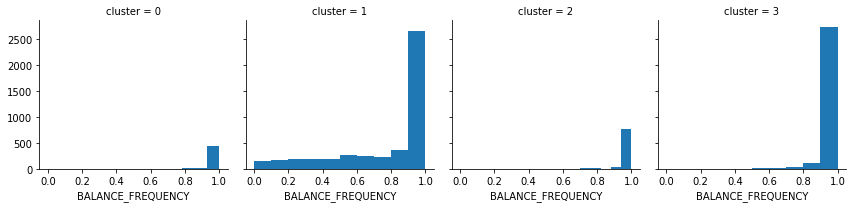

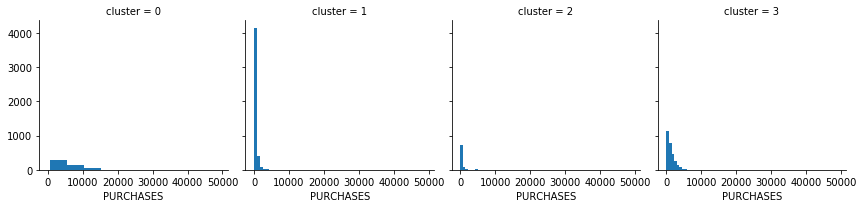

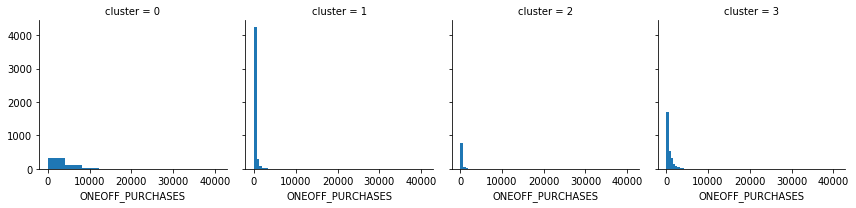

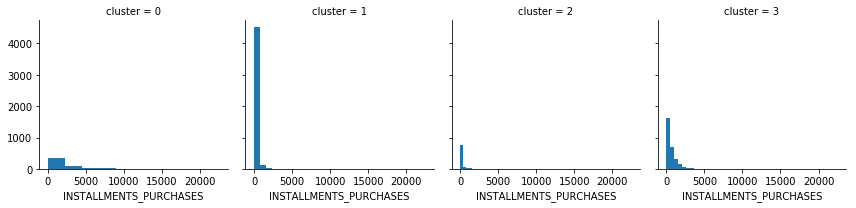

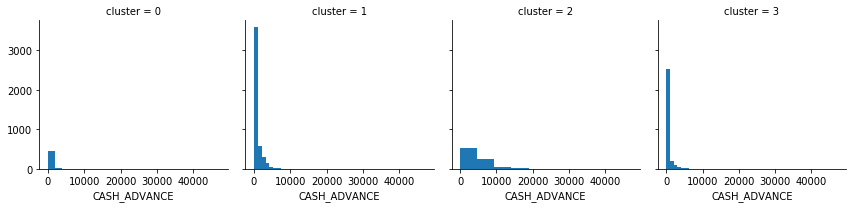

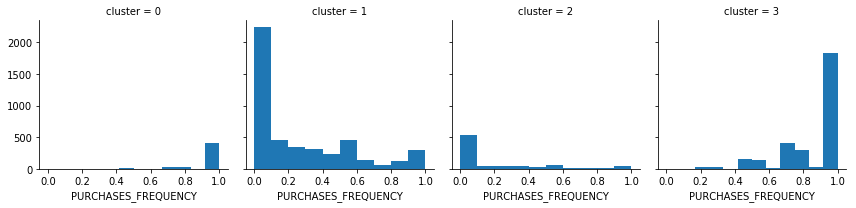

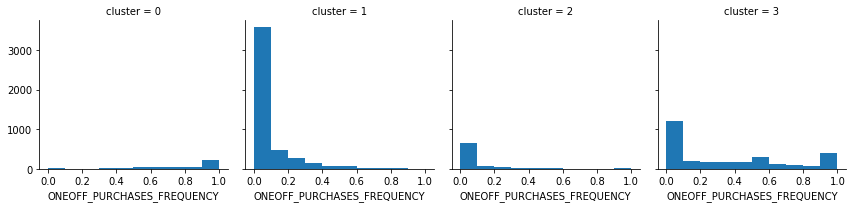

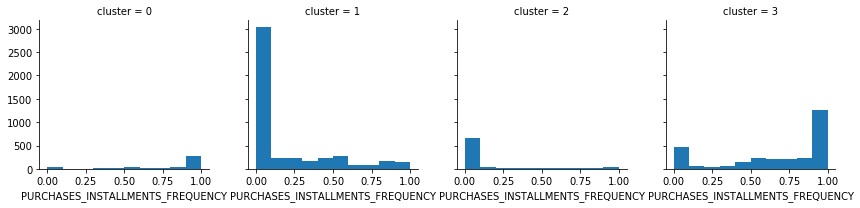

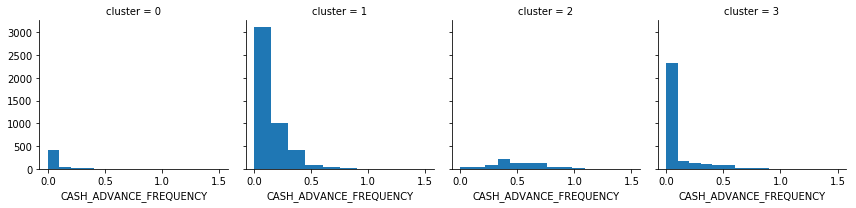

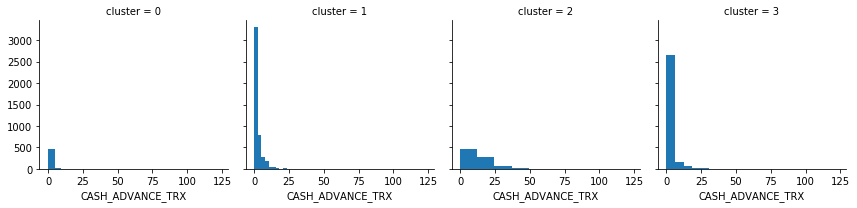

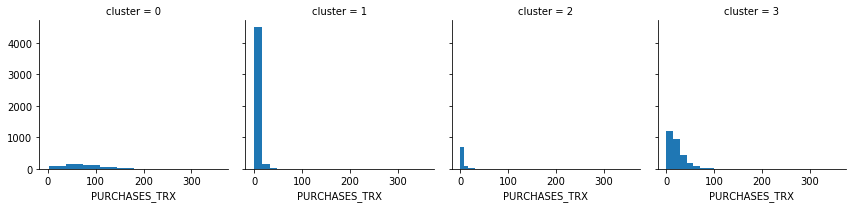

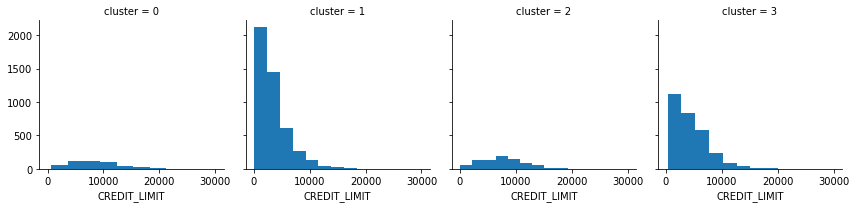

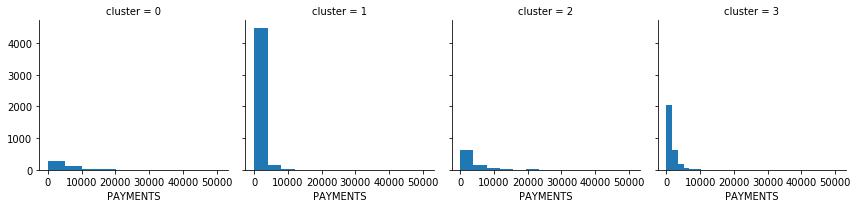

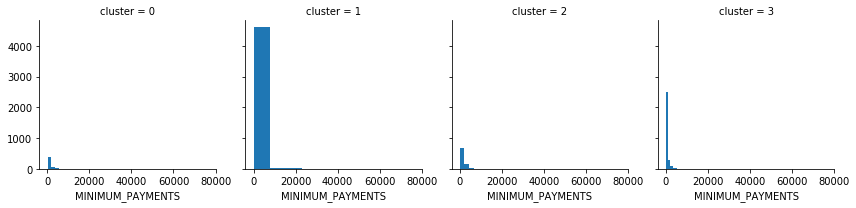

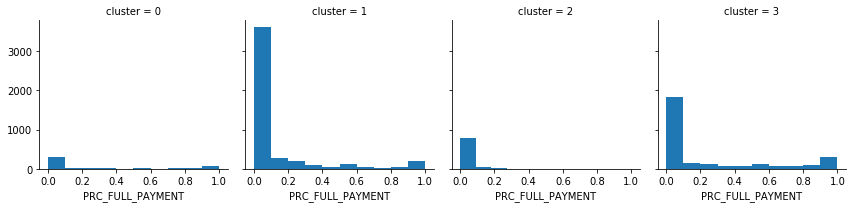

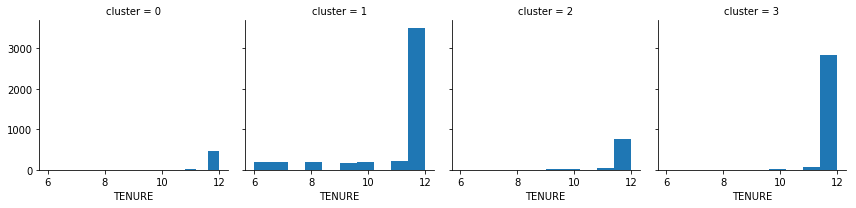

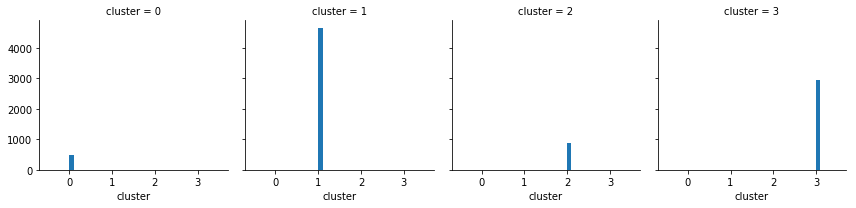

In [0]:
for c in clusters:
  grid = sns.FacetGrid(clusters, col='cluster')
  grid.map(plt.hist, c)

# Self-Organizing Feature Maps (Kohonen)

In [0]:
!pip install neupy

     |████████████████████████████████| 235kB 4.9MB/s 
     |████████████████████████████████| 92.5MB 1.4MB/s 
     |████████████████████████████████| 368kB 33.6MB/s 
     |████████████████████████████████| 3.2MB 41.2MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import matplotlib.pyplot as plt
from neupy import algorithms, utils

plt.style.use('ggplot')
utils.reproducible()    

sofm = algorithms.SOFM(
      n_inputs=17,
    
      # количество кластеров
      n_outputs=6,
      
      # количество нейронов, которые обновляются одновременно
      learning_radius=0,

      # шаг обучения
      step=0.25,
    
      shuffle_data=True,
    
      weight='sample_from_data',
    
      verbose=True,
  )
sofm.train(X, epochs=10)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 17
[OPTION] n_outputs = 6
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.25
[OPTION] verbose = True
[OPTION] weight = sample_data



#1 : [2 sec] train: 0.483823


#2 : [2 sec] train: 0.504363


#3 : [2 sec] train: 0.498540


#4 : [2 sec] train: 0.499230


#5 : [2 sec] train: 0.497517


#6 : [2 sec] train: 0.499502


#7 : [2 sec] train: 0.502243


#8 : [2 sec] train: 0.510256


#9 : [2 sec] train: 0.492997
#10 : [2 sec] train: 0.491741


In [0]:
answer = sofm.predict(X)
answer

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [0]:
labels = np.argmax(answer,axis=1)

In [0]:
clusters=pd.concat([data_prepared, pd.DataFrame({'cluster':labels})], axis=1)

In [0]:
parts = clusters['cluster'].value_counts()
parts

2    4368
1    3128
4     744
0     649
5      37
3      24
Name: cluster, dtype: int64

([<matplotlib.patches.Wedge at 0x7f54d2221898>,
 [Text(0.04130491012472951, 1.0992242284445828, '2'),
  Text(-0.5730191474466062, -0.9389616907305456, '1'),
  Text(0.7976237099423933, -0.7574935097660791, '4'),
  Text(1.0599619217059273, -0.29407605229511274, '0'),
  Text(1.0995104173270256, -0.032815273720480174, '5'),
  Text(1.0999609653196019, -0.00926686425765731, '3')],
 [Text(0.022529950977125186, 0.5995768518788632, '48.8%'),
  Text(-0.3125558986072397, -0.5121609222166612, '34.9%'),
  Text(0.4350674781503963, -0.41317827805422497, '8.3%'),
  Text(0.578161048203233, -0.16040511943369784, '7.3%'),
  Text(0.5997329549056503, -0.017899240211171005, '0.4%'),
  Text(0.5999787083561464, -0.005054653231449441, '0.3%')])

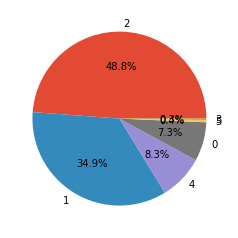

In [0]:
plt.pie(parts,labels=parts.index,autopct='%1.1f%%')

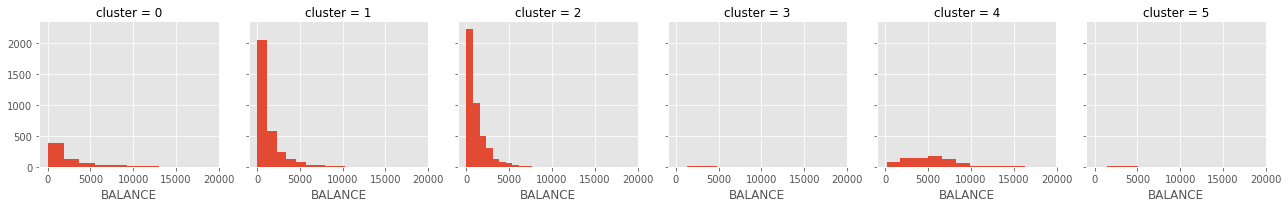

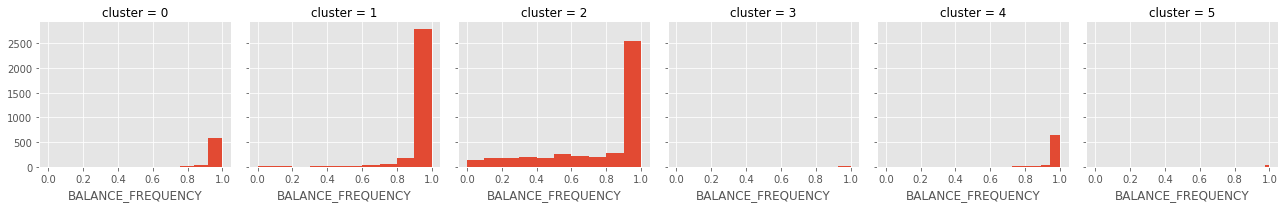

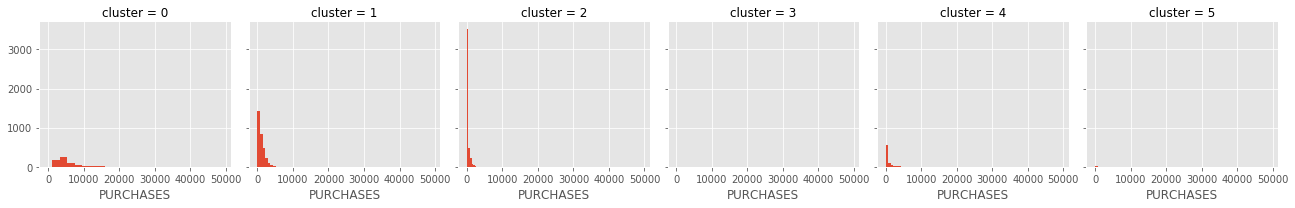

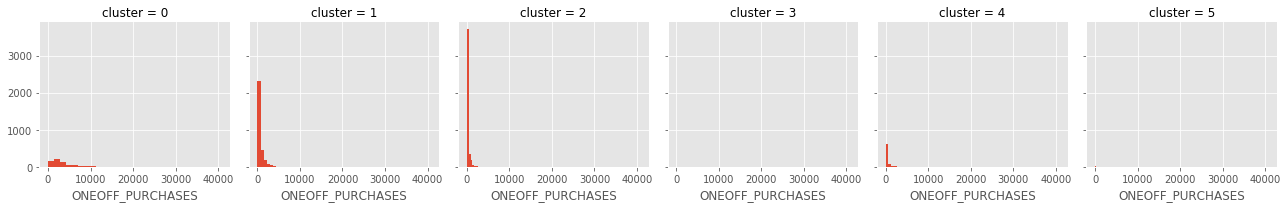

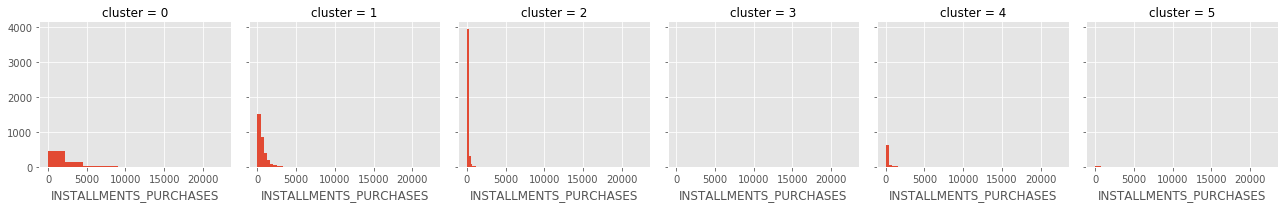

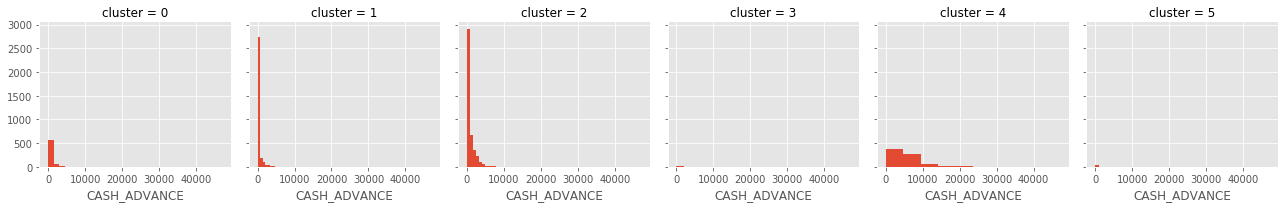

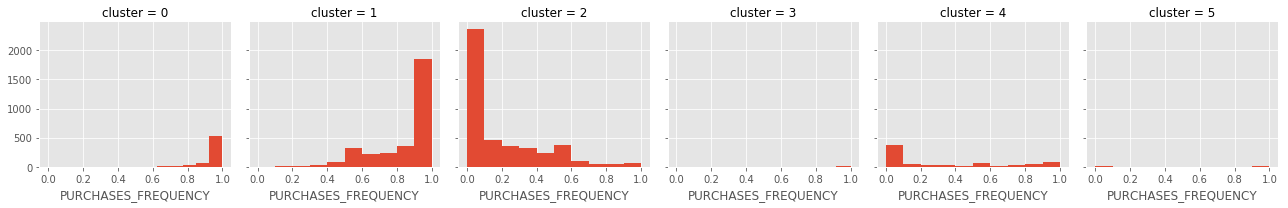

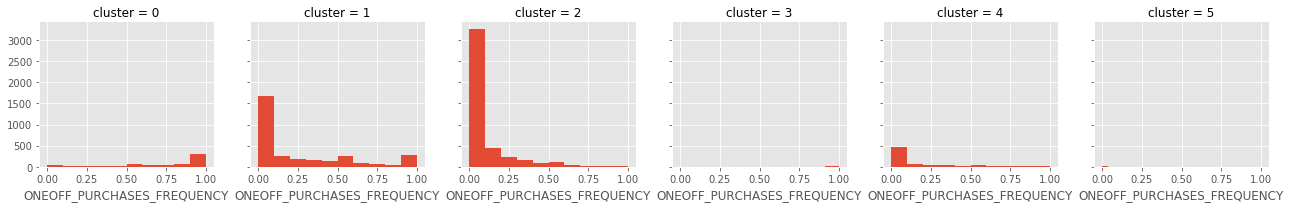

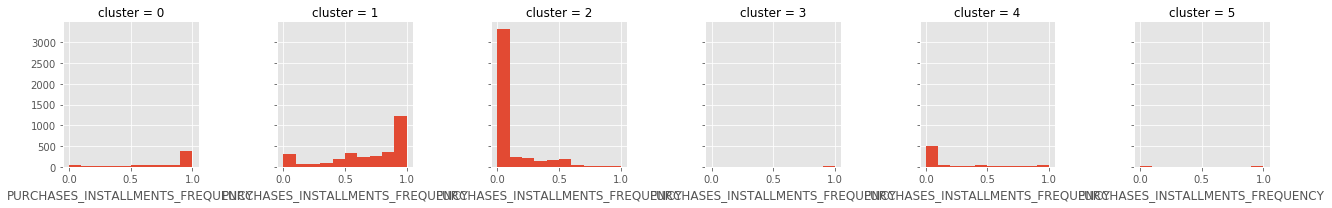

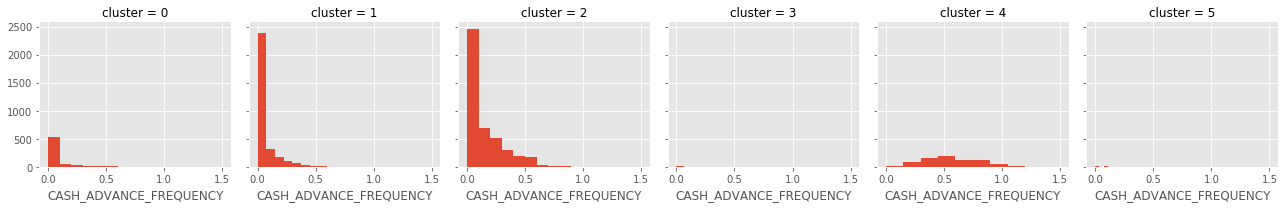

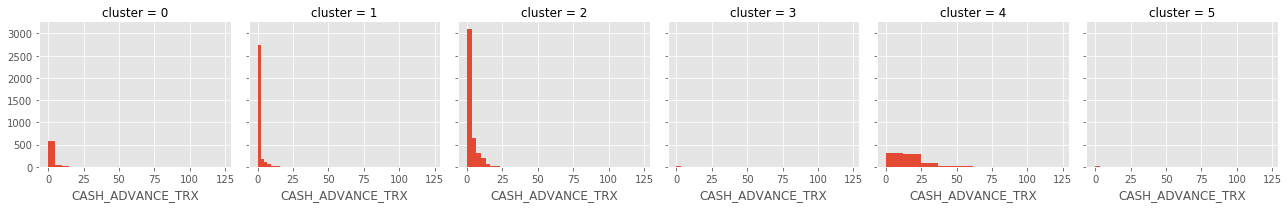

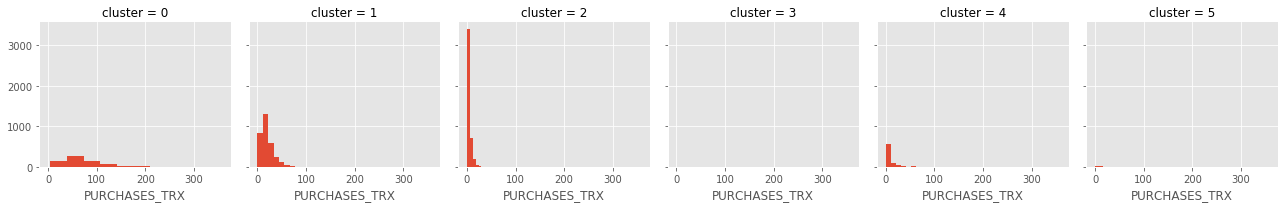

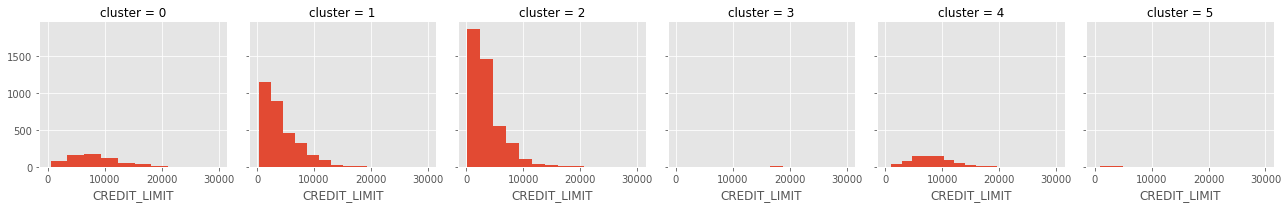

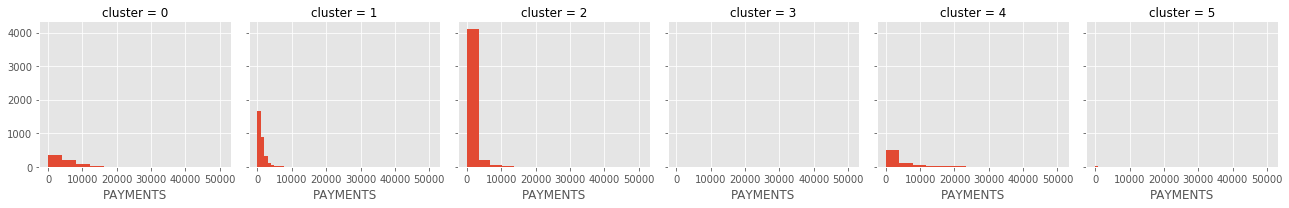

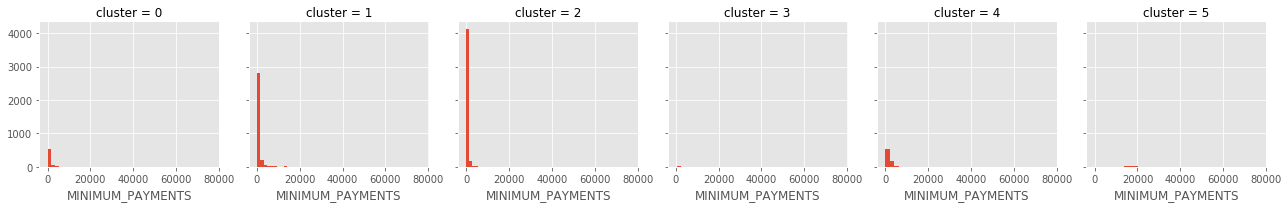

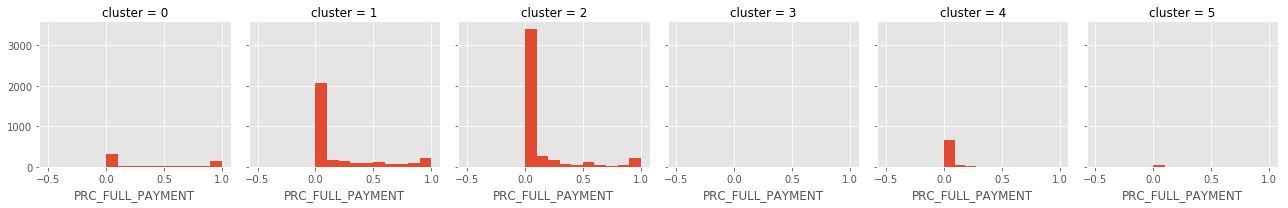

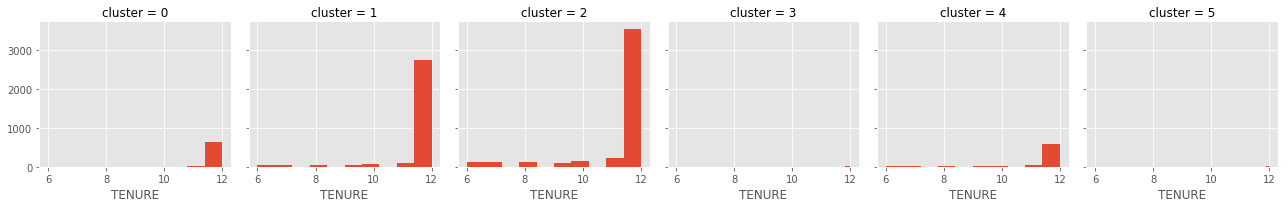

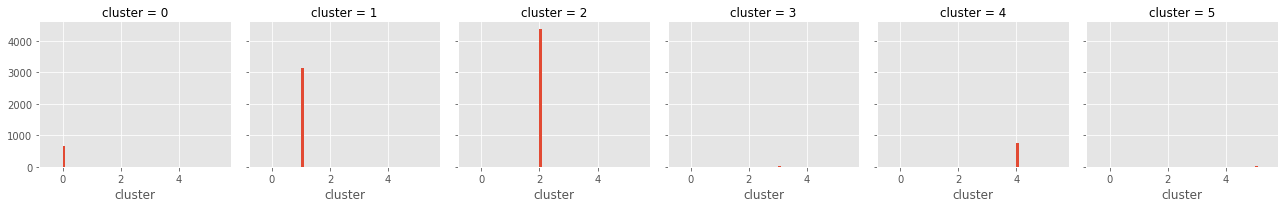

In [0]:
for c in clusters:
  grid = sns.FacetGrid(clusters, col='cluster')
  grid.map(plt.hist, c)

# Visualisation

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3) 
pca.fit(X) 
X_pca=pca.transform(X) 

print("shape of X_pca", X_pca.shape)

shape of X_pca (8950, 3)


In [0]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


[0.48400315 0.36006648 0.15593037]


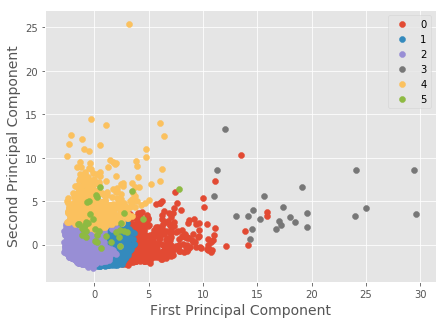

In [0]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labl={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5'}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
  ix=np.where(labels==l)
  
  ax.scatter(Xax[ix],Yax[ix],label=labl[l],
            )
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


# Другие разновидности алгоритмов

In [0]:
#(Density-based spatial clustering of applications with noise) DBSCAN
#Основанная на плотности пространственная кластеризация для приложений с шумами

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.1, min_samples=10).fit(X)
labels = db.labels_

In [0]:
print(labels)
import collections
collections.Counter(labels)

[ 0 -1  0 ...  0 -1 -1]


Counter({-1: 3077, 0: 5823, 1: 27, 2: 6, 3: 8, 4: 9})

# Сети Кохонена для описания данных

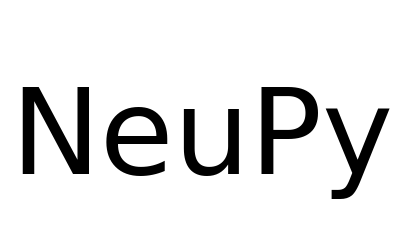

In [0]:
# генерация данных

import matplotlib.pyplot as plt

red, blue, white = ('#E24A33', '#348ABD', '#FFFFFF')

ax = plt.gca()
ax.patch.set_facecolor(white)
ax.text(0, 0.25, 'NeuPy', fontsize=120)

plt.xticks([])
plt.yticks([])

plt.savefig('neupy-text.png', facecolor=white, bbox_inches='tight')

(238, 401, 4)


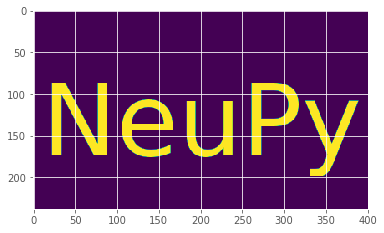

In [0]:
# кодируем пиксели 0-1
import matplotlib.image as mpimg 

neupy_text = mpimg.imread('neupy-text.png')
print(neupy_text.shape)
neupy_text = (1 - neupy_text / 255.).max(axis=2)

plt.imshow(neupy_text)


In [0]:
import numpy as np
data = []
for (x, y), value in np.ndenumerate(neupy_text):
    if value == 1:
        data.append([y, -x + 300])

data = np.array(data)

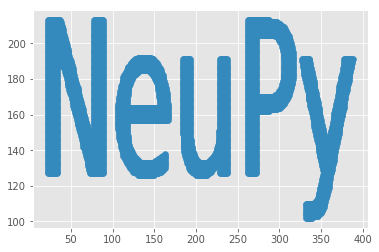

In [0]:
plt.scatter(*data.T, color=blue)
plt.show()

In [0]:
# количество нейронов
n = 300

# инициализируем вектор весов
weight = np.zeros((2, n))

# ширина весов под текст
weight[0, :] = np.linspace(25, 400, n)

weight[1, :] = (np.sin(np.linspace(0, 100, n)) + 1) *1 + 1
weight = np.concatenate([weight, weight], axis=1)

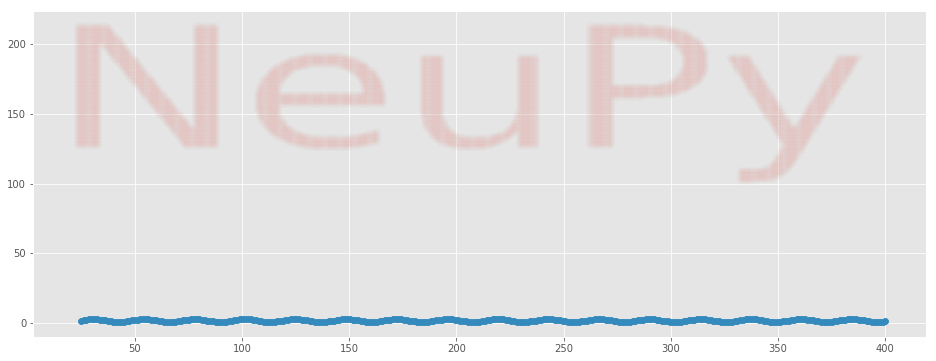

In [0]:
plt.figure(figsize=(16, 6))
plt.scatter(*weight, zorder=100, color=blue)
plt.scatter(*data.T, color=red, alpha=0.01)
plt.show()

In [0]:
from neupy import algorithms

sofm = algorithms.SOFM(
    n_inputs=2,
    
    features_grid=(2, n),
    
    weight=weight,

    step=0.05,

    learning_radius=10,

    reduce_radius_after=1,

    reduce_step_after=10,
)

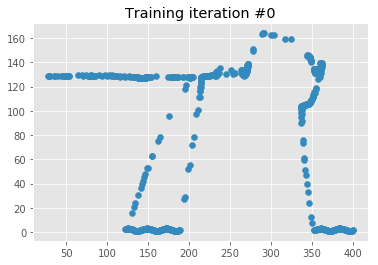

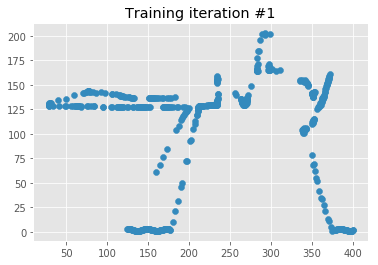

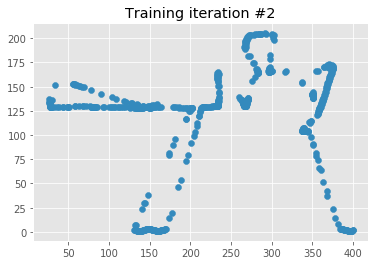

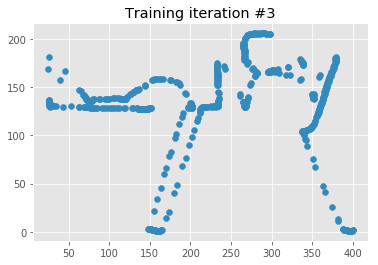

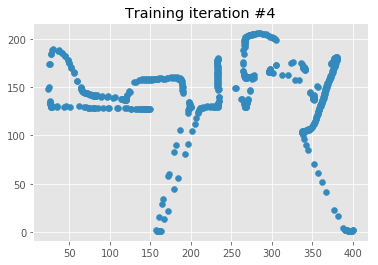

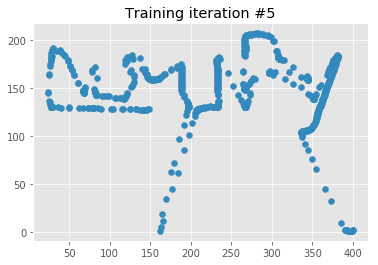

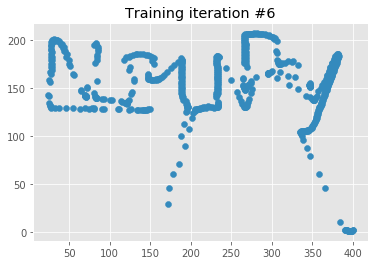

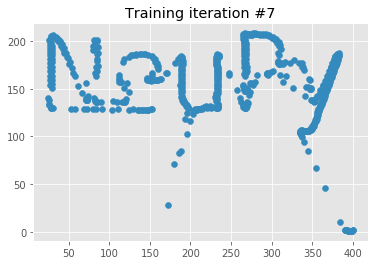

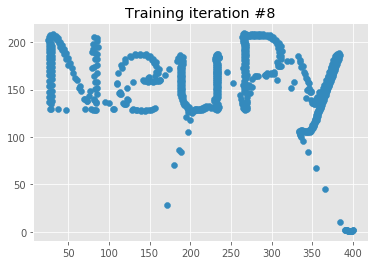

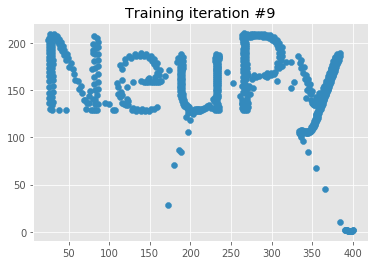

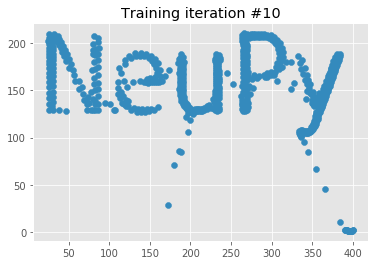

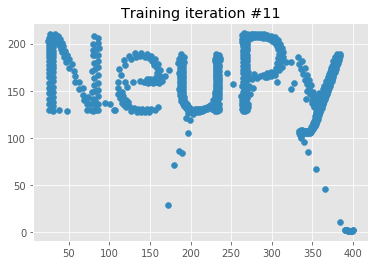

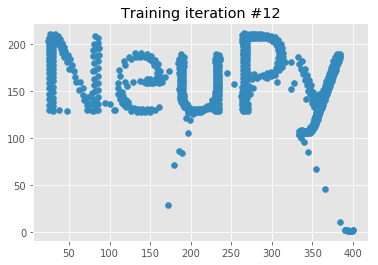

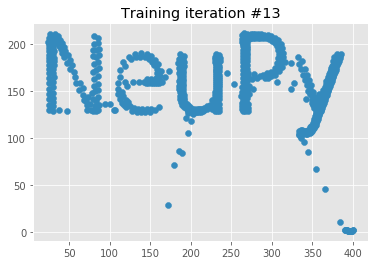

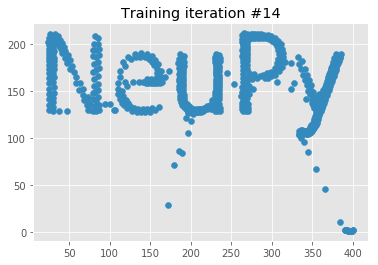

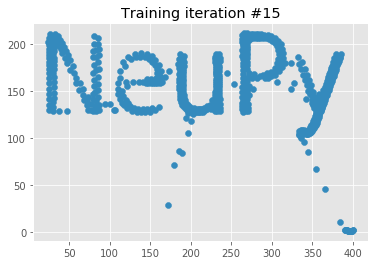

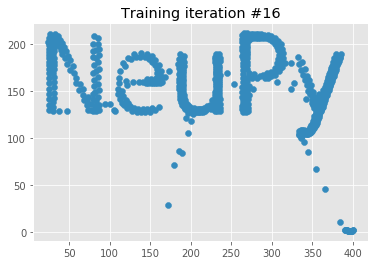

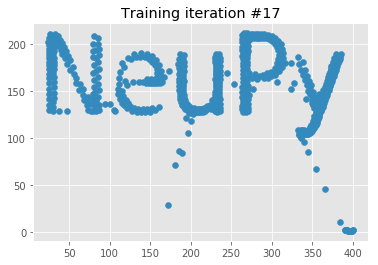

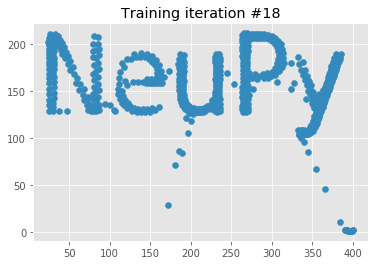

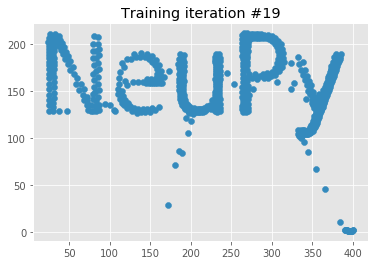

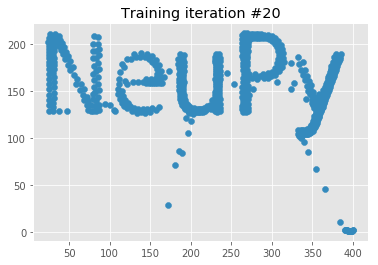

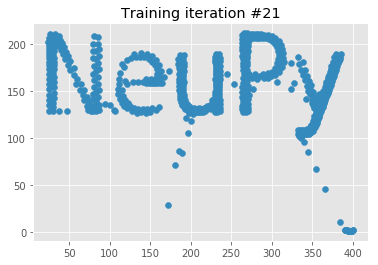

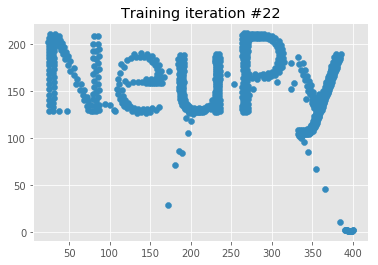

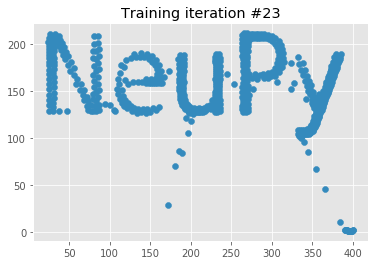

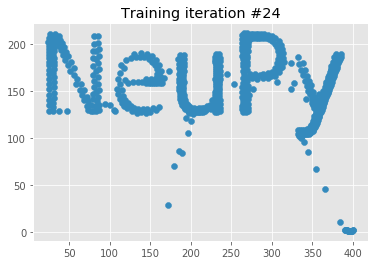

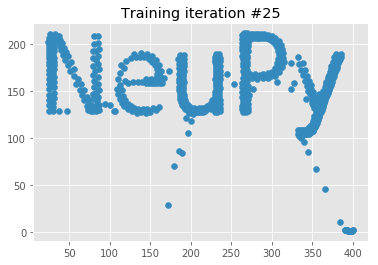

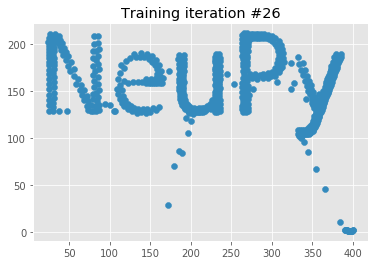

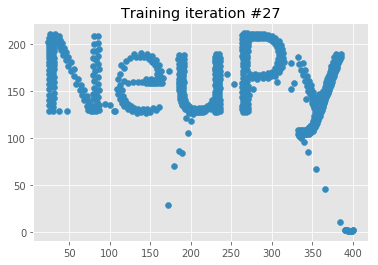

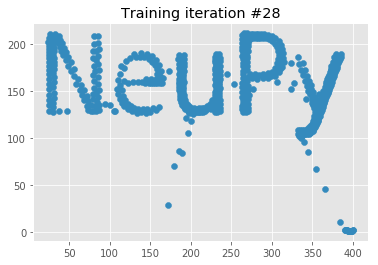

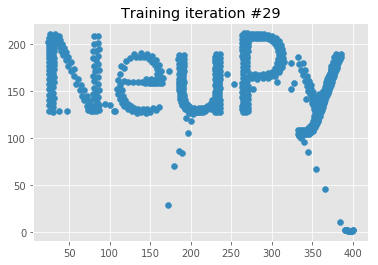

In [0]:
plt.ion()
for iteration in range(30):
    sofm.train(data, epochs=1)

    plt.title('Training iteration #{}'.format(iteration))
    plt.scatter(*sofm.weight, color=blue)
    plt.show()
    

# Домашнее задание LIGHT

 На входе датасет с информацией о лепестках Ириса
 
 1) Кластеризовать датасет разными алгоритмами
 
 2) Оценить качество кластеризации(посчитать метрику между кластеризованными данными и реальным значением таргета), написать отчет
 
 Метрики:
 
from sklearn impoort metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels)

print("Silhouette: %0.3f" %metrics.silhouette_score(X, algorithm.labels_))

In [0]:
from sklearn import datasets
data = datasets.load_iris()


In [0]:
target_names = data.target_names
X = data.data
y = data.target

In [0]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# SECTION WORK


In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import pandas as pd
otto = pd.read_csv('train.csv',index_col=False)

In [0]:
otto.head(10)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
5,6,2,1,0,0,7,0,0,0,0,0,0,0,2,0,0,0,6,0,0,2,0,0,0,5,0,0,0,0,1,0,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,5,0,1,0,1,4,2,6,0,2,4,2,0,0,1,0,2,0,4,3,0,0,0,0,1,0,3,0,0,0,0,2,0,0,Class_1
6,7,2,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,2,0,0,0,0,0,0,1,0,2,...,2,0,0,0,0,2,0,1,0,3,1,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,Class_1
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Class_1
8,9,0,0,0,0,0,0,0,4,0,0,0,1,7,0,0,0,1,0,0,2,0,0,0,7,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,...,2,0,0,0,0,1,0,2,0,0,0,3,4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,Class_1
9,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,2,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Class_1


In [0]:
otto['target'] = otto['target'].astype('category').cat.codes


In [0]:
otto['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [0]:
X = otto.drop(['id','target'],axis=1).values
y = otto['target'].values

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15) 
pca.fit(X) 
X_pca=pca.transform(X) 

In [0]:
X_pca.shape

(61878, 15)

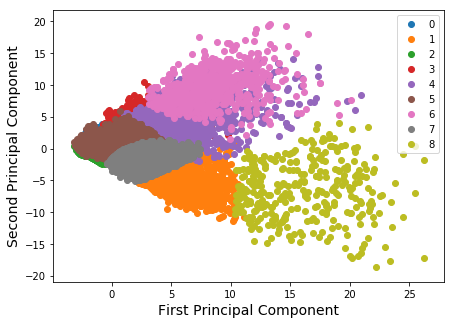

In [0]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labl={0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
  ix=np.where(labels==l)
  
  ax.scatter(Xax[ix],Yax[ix],label=labl[l],
            )
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [0]:
optimal_number_clusters = 9
kmean = KMeans(optimal_number_clusters)
kmean.fit(X_pca)
labels = kmean.labels_

In [0]:
labels

array([6, 6, 6, ..., 6, 6, 6], dtype=int32)

In [0]:
labels = cluster.labels_

NameError: ignored

In [0]:
from sklearn import metrics

print("Homogeneity: %0.3f"%metrics.homogeneity_score(y, labels))

print("Completeness: %0.3f"%metrics.completeness_score(y, labels))

print("V-measure: %0.3f"%metrics.v_measure_score(y, labels))


# print("Silhouette: %0.3f"% metrics.silhouette_score(X, labels))

Homogeneity: 0.243
Completeness: 0.316
V-measure: 0.274
Accuracy: 0.069


# Домашнее задание PRO


Ссылка на датасет из Otto Group Product Classification Challenge:
https://www.kaggle.com/c/otto-group-product-classification-challenge/data

Скачиваем файл train.csv

У вас есть десять классов в таргете, и около 100 фич в данных.

1) Кластеризовать представленный датасет

2) Получить максимальный score (желательно выше 0.8), полученный сравнением реальных маркеров и маркеров кластеризации ( варианты скоров берем из light задания). 

3)Использовать различные алгоритмы и настраивать их параметры

4) Написать отчет


По желанию: кластеризовать набор данных MNIST
(ссылка помощник:
https://github.com/wdlv/Clustering-on-the-MNIST-data/blob/master/Clustering_Classification.ipynb)
